In [1]:
import pandas as pd

In [2]:
product = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/20220304/data.csv")
product.head()

,Species,Weight,Length,Diagonal,Height,Width
0,A,242.0,25.4,30.0,11.5200,4.0200
1,A,290.0,26.3,31.2,12.4800,4.3056
2,A,340.0,26.5,31.1,12.3778,4.6961
3,A,363.0,29.0,33.5,12.7300,4.4555
4,A,430.0,29.0,34.0,12.4440,5.1340


### 사이킷런 계열의 데이터 타입은  np.array

In [10]:
product_y = product['Species'].to_numpy()

In [20]:
product_x =  product.iloc[: , 1:].to_numpy()

In [22]:
product_x[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

# k-최근접 이웃의 다중 분류

In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =  train_test_split(product_x, product_y,random_state=42)
train_x.shape,  test_x.shape, train_y.shape ,  test_y.shape

((119, 5), (40, 5), (119,), (40,))

# 다중분류는 서로다른 그룹에 대한 분류작업... 표준화 작업

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_x)
train_scaled =  ss.transform(train_x)
test_scaled =  ss.transform(test_x)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# 이웃의 갯수는 3개로
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_y)
kn.score(train_scaled,train_y), kn.score(test_scaled, test_y)

(0.8823529411764706, 0.85)

In [39]:
print(kn.classes_)

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [42]:
predict = kn.predict(test_scaled)
predict[:5], test_y[:5]

(array(['E', 'G', 'F', 'E', 'E'], dtype=object),
 array(['E', 'G', 'F', 'C', 'E'], dtype=object))

In [43]:
proba = kn.predict_proba(test_scaled[:5])
proba

array([[0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.66666667,
        0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.66666667,
        0.        , 0.        ]])

# 로지스틱 회귀 Logistic Regression--> 예측? but 분류
### 확율을 0 ~ 1사이의 값으로 예측
### 더 높은 값으로 분류을 해준다.
### 이진분류에 적합하다.. 이진 0과 1을 분류하는것으로 
### 남자 여자, 합격 불합격, 양품 불량, 맞다 틀리다, 사망  생존

In [45]:
import numpy as np
import matplotlib.pyplot as plt

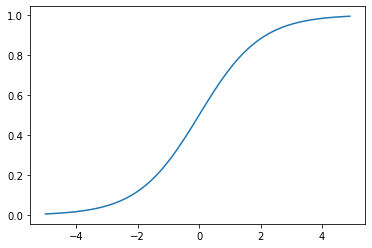

In [50]:
z = np.arange(-5,5,0.1)
phi = 1 / (1+np.exp(-z))

plt.plot(z,phi)
plt.show()

In [61]:
np.unique(product_y, return_counts=True)  # numpy 형태로

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array([35, 20,  6, 11, 56, 17, 14], dtype=int64))

In [62]:
pd.value_counts( product_y) # dataFrame 형태로

E    56
A    35
B    20
F    17
G    14
D    11
C     6
dtype: int64

In [64]:
# 이진 분류 수행하기
# product type  E or A인 데이터만 추출
a = np.array(['A','B','C','D','E'])
a == 'B'
a[a == 'B']

array(['B'], dtype='<U1')

In [69]:
train_y.shape, train_x.shape

((119,), (119, 5))

In [70]:
E_A_index =  (train_y == 'E') | (train_y == 'A')
train_E_A_x =  train_x[E_A_index]
train_E_A_y = train_y[E_A_index]
train_E_A_x.shape,  train_E_A_y.shape

((68, 5), (68,))

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()
lr.fit(train_E_A_x,train_E_A_y)

LogisticRegression()

In [73]:
lr.predict(train_E_A_x[:5])  # 분류모델....

array(['A', 'E', 'E', 'A', 'E'], dtype=object)

In [74]:
lr.predict_proba(train_E_A_x[:5])

array([[0.99567265, 0.00432735],
       [0.00262143, 0.99737857],
       [0.00346398, 0.99653602],
       [0.99469089, 0.00530911],
       [0.00771475, 0.99228525]])

In [75]:
lr.classes_

array(['A', 'E'], dtype=object)

In [77]:
print(lr.coef_) #  가중치
print(lr.intercept_) # 절편, bias

[[ 0.01149862  0.50711407 -0.54325124 -1.47655343  0.1469643 ]]
[13.85359966]


# 이진분류면..... --> 로지스틱 회귀를 사용 권장
## 다중분류 수행

In [79]:
lr = LogisticRegression(max_iter=10000)
lr.fit(train_scaled,train_y)

LogisticRegression(max_iter=10000)

In [83]:
lr.predict(train_scaled,train_y)

TypeError: predict() takes 2 positional arguments but 3 were given